# Network Intrusion Detection

## Classification Problem




Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders. This project aims to build a network intrusion detector, a predictive model capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections.

#### List of import statements 

In [1]:
import json
import os
import csv
import collections
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import shutil
import time
import io
import requests
from scipy.stats import zscore
from scipy import stats
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from keras import optimizers
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn import preprocessing
from sklearn import utils
import sklearn.feature_extraction.text as sk_text
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, r2_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')

#### Section 2 - Data read and preprocessing

In [2]:
df_nid = pd.read_csv('./data.csv', delimiter =",", encoding="utf-8")

In [3]:
df_nid.head

<bound method NDFrame.head of         0  tcp  http  SF  181  5450  0.1  0.2  0.3  0.4  ...  9.1  1.00.1  \
0       0  tcp  http  SF  239   486    0    0    0    0  ...   19     1.0   
1       0  tcp  http  SF  235  1337    0    0    0    0  ...   29     1.0   
2       0  tcp  http  SF  219  1337    0    0    0    0  ...   39     1.0   
3       0  tcp  http  SF  217  2032    0    0    0    0  ...   49     1.0   
4       0  tcp  http  SF  217  2032    0    0    0    0  ...   59     1.0   
...    ..  ...   ...  ..  ...   ...  ...  ...  ...  ...  ...  ...     ...   
494015  0  tcp  http  SF  310  1881    0    0    0    0  ...  255     1.0   
494016  0  tcp  http  SF  282  2286    0    0    0    0  ...  255     1.0   
494017  0  tcp  http  SF  203  1200    0    0    0    0  ...  255     1.0   
494018  0  tcp  http  SF  291  1200    0    0    0    0  ...  255     1.0   
494019  0  tcp  http  SF  219  1234    0    0    0    0  ...  255     1.0   

        0.00.6  0.11  0.00.7  0.00.8  0.00.9 

#### As above dataset does not have columns, initialize the columns below - 

In [4]:
df_nid.columns = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

In [5]:
df_nid.head

<bound method NDFrame.head of         duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        239        486     0   
1              0           tcp    http   SF        235       1337     0   
2              0           tcp    http   SF        219       1337     0   
3              0           tcp    http   SF        217       2032     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494015         0           tcp    http   SF        310       1881     0   
494016         0           tcp    http   SF        282       2286     0   
494017         0           tcp    http   SF        203       1200     0   
494018         0           tcp    http   SF        291       1200     0   
494019         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0    

#### Use the drop_duplicates method from the pandas library on a DataFrame called df_nid. The purpose of this method is to remove duplicate rows from the DataFrame based on the specified columns. Here's what each argument does in the method:

1. subset: This specifies the columns to consider when identifying duplicates. Since it is set to None, the method will consider all columns in the DataFrame for duplicate identification.
2. keep: This specifies which duplicate rows to keep. In this case, it is set to False, which means that all duplicate rows will be removed (i.e., no duplicate rows will be kept in the resulting DataFrame).
3. inplace: This determines whether the method should modify the original DataFrame (True) or return a new DataFrame with duplicates removed (False). Here, it is set to False, so a new DataFrame will be returned.

In [6]:
df_refined_nid = df_nid.drop_duplicates(subset=None,keep=False,inplace = False)

In [7]:
df_refined_nid.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


##### using the dropna() method from the pandas library on df_refined_nid. The purpose of this method is to remove rows with missing values (NaN or None) from the DataFrame.



In [8]:
df_refined_nids = df_refined_nid.dropna()

In [9]:
df_refined_nids.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

#### Below are all the preprocessing functions required for this notebook

In [10]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low


## Confusion Matrix

#### A confusion matrix, also known as an error matrix, is a specific table layout that is used to visualize and evaluate the performance of a classification algorithm. It helps to understand the true positives, true negatives, false positives, and false negatives produced by the classifier, and is particularly useful for problems with more than two classes.

The confusion matrix displays the actual class labels (also known as the ground truth) against the predicted class labels produced by the classifier. Each row of the matrix represents the instances of an actual class, while each column represents the instances of a predicted class.

The main elements of a confusion matrix are:

1. True Positives (TP): The number of instances correctly classified as belonging to a certain class.
2. True Negatives (TN): The number of instances correctly classified as not belonging to a certain class.
3. False Positives (FP): The number of instances incorrectly classified as belonging to a certain class, when they actually do not belong to that class.
4. False Negatives (FN): The number of instances incorrectly classified as not belonging to a certain class, when they actually belong to that class.

The confusion matrix is a valuable tool for measuring classifier performance and diagnosing potential issues, such as class imbalance or misclassification patterns. It can be used to derive various classification metrics, including accuracy, precision, recall, and F1 score.

In [11]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [12]:
encode_numeric_zscore(df_refined_nids,'duration')
encode_numeric_zscore(df_refined_nids,'src_bytes')
encode_numeric_zscore(df_refined_nids,'dst_bytes')

In [13]:
df_refined_nids[0:200]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,-0.109284,tcp,http,SF,-0.004564,-0.042751,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,-0.109284,tcp,http,SF,-0.004567,-0.029719,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,-0.109284,tcp,http,SF,-0.004575,-0.029719,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,-0.109284,tcp,http,SF,-0.004576,-0.019076,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,-0.109284,tcp,http,SF,-0.004576,-0.019076,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.109284,tcp,http,SF,-0.004561,-0.023884,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
196,-0.109284,tcp,http,SF,-0.004575,-0.027468,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
197,-0.109284,tcp,http,SF,-0.004573,-0.024910,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
198,-0.109284,tcp,http,SF,-0.004577,-0.033226,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.


In [14]:
encode_text_dummy(df_refined_nids,"protocol_type")

In [15]:
df_refined_nids[0:200]


,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,protocol_type-icmp,protocol_type-tcp,protocol_type-udp
0,-0.109284,http,SF,-0.004564,-0.042751,0,0,0,0,0,...,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
1,-0.109284,http,SF,-0.004567,-0.029719,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
2,-0.109284,http,SF,-0.004575,-0.029719,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
3,-0.109284,http,SF,-0.004576,-0.019076,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
4,-0.109284,http,SF,-0.004576,-0.019076,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.109284,http,SF,-0.004561,-0.023884,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
196,-0.109284,http,SF,-0.004575,-0.027468,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
197,-0.109284,http,SF,-0.004573,-0.024910,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
198,-0.109284,http,SF,-0.004577,-0.033226,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0


In [16]:
encode_text_index(df_refined_nids,"service")

array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
       'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
       'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
       'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin',
       'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
       'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
       'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
       'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
       'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
       'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'],
      dtype=object)

In [17]:
df_refined_nids[0:200]


,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,protocol_type-icmp,protocol_type-tcp,protocol_type-udp
0,-0.109284,22,SF,-0.004564,-0.042751,0,0,0,0,0,...,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
1,-0.109284,22,SF,-0.004567,-0.029719,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
2,-0.109284,22,SF,-0.004575,-0.029719,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
3,-0.109284,22,SF,-0.004576,-0.019076,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
4,-0.109284,22,SF,-0.004576,-0.019076,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.109284,22,SF,-0.004561,-0.023884,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
196,-0.109284,22,SF,-0.004575,-0.027468,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
197,-0.109284,22,SF,-0.004573,-0.024910,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
198,-0.109284,22,SF,-0.004577,-0.033226,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0


In [18]:
encode_text_index(df_refined_nids,"flag")

array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
       'SF', 'SH'], dtype=object)

In [19]:
df_refined_nids[0:5]


,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,protocol_type-icmp,protocol_type-tcp,protocol_type-udp
0,-0.109284,22,9,-0.004564,-0.042751,0,0,0,0,0,...,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
1,-0.109284,22,9,-0.004567,-0.029719,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
2,-0.109284,22,9,-0.004575,-0.029719,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
3,-0.109284,22,9,-0.004576,-0.019076,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0
4,-0.109284,22,9,-0.004576,-0.019076,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0


In [20]:
df_refined_nids["outcome"]


0         normal.
1         normal.
2         normal.
3         normal.
4         normal.
           ...   
494015    normal.
494016    normal.
494017    normal.
494018    normal.
494019    normal.
Name: outcome, Length: 126208, dtype: object

In [21]:
df_copy = df_refined_nids.copy()

In [22]:
df_refined_nids["outcome"].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [23]:
df_copy["outcome"].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [24]:
df_copy.outcome[df_refined_nids.outcome == "normal."] = 0

In [25]:
df_copy["outcome"].unique()

array([0, 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [26]:
columns = ['buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.']
for x in columns:
    df_copy.outcome[df_refined_nids.outcome == x] = 1

In [27]:
df_copy["outcome"].unique()

array([0, 1], dtype=object)

In [28]:
df_copy["outcome"].count()

126208

In [29]:
df_copy['outcome'].value_counts()

0    85595
1    40613
Name: outcome, dtype: int64

In [30]:
df_copy[0:5]

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,protocol_type-icmp,protocol_type-tcp,protocol_type-udp
0,-0.109284,22,9,-0.004564,-0.042751,0,0,0,0,0,...,0.05,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,-0.109284,22,9,-0.004567,-0.029719,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,-0.109284,22,9,-0.004575,-0.029719,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,0,0,1,0
3,-0.109284,22,9,-0.004576,-0.019076,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,-0.109284,22,9,-0.004576,-0.019076,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,0,0,1,0


#### Spltting data into train and test for Scikit learn models 

In [31]:
refined_Xarr = df_copy[['duration','flag','service','src_bytes','dst_bytes','protocol_type-icmp','protocol_type-tcp','protocol_type-udp']].values


In [32]:
refined_Y = np.array(df_copy.outcome)

In [33]:
X_train_p1, X_test_p1, y_train_p1, y_test_p1 = train_test_split(refined_Xarr, refined_Y, test_size=0.3, random_state=1)

In [34]:
X_train_p1=X_train_p1.astype('int')
X_test_p1=X_test_p1.astype('int')

y_test_p1=y_test_p1.astype('int')
y_train_p1=y_train_p1.astype('int')

In [35]:
connect_type = encode_text_index(df_copy,'outcome')

##### Logistic Regression Model 

Logistic Regression is a statistical method used for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). It is used to predict a binary outcome (1/0, Yes/No, True/False) given a set of independent variables.

In scikit-learn, a popular Python machine learning library, Logistic Regression is implemented as a class named LogisticRegression in the linear_model module. Scikit-learn's implementation of Logistic Regression provides an efficient and user-friendly way to train a logistic regression model on your dataset, make predictions, and evaluate the performance of the classifier.

MODEL: Logistic Regression


Confusion Matrix:
[[24168  1535]
 [ 1557 10603]]


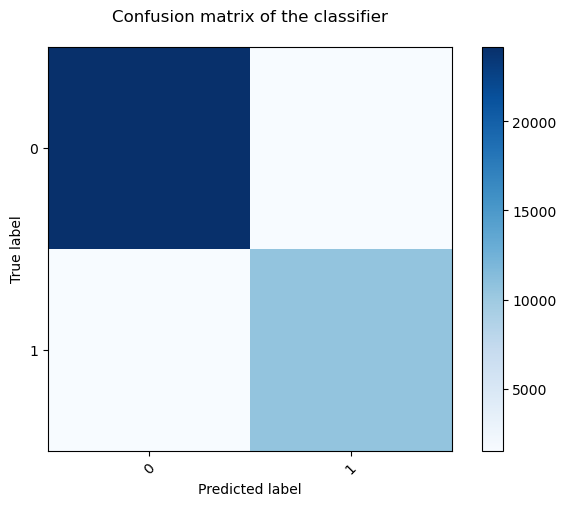



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     25703
           1       0.87      0.87      0.87     12160

    accuracy                           0.92     37863
   macro avg       0.91      0.91      0.91     37863
weighted avg       0.92      0.92      0.92     37863

Actual Values:
[1 1 1 0 1 0 1 0 1 0]


Predicted Values:
[1 1 1 1 1 0 1 0 1 0]


Actual Values:
['Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good']


Predicted Values:
['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good']


Accuracy score: 0.9183371629295091


Plotting ROC Curve:
--------------------------------------------------


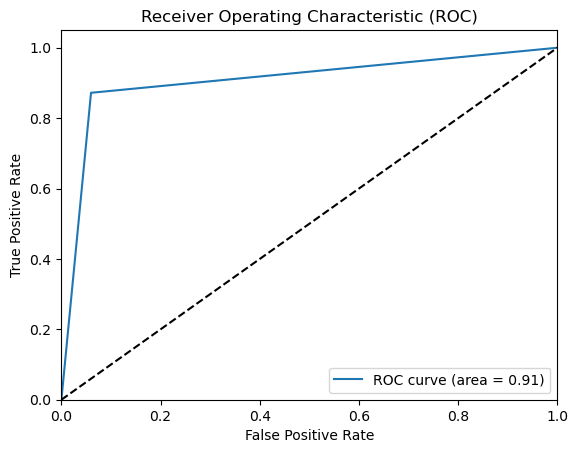

In [36]:
#Logistic Regression

lor = LogisticRegression()
lor.fit(X_train_p1, y_train_p1)
pred_log = lor.predict(X_test_p1)

print ('MODEL: Logistic Regression')
print 
print('\n')
print('Confusion Matrix:')

labels = [0, 1]
cm = confusion_matrix(y_test_p1, pred_log)
print(cm)
plt.figure()
plot_confusion_matrix(cm, connect_type)

plt.title('Confusion matrix of the classifier\n')

plt.show()

print('\n')
print('Classification Report:')
print(classification_report(y_test_p1, pred_log))

print('Actual Values:')
print(y_test_p1[:10])
print('\n')
print('Predicted Values:')
print(pred_log[:10])

dic = {1:'Bad', 0:'Good'}

test = [dic.get(n, n) for n in y_test_p1]
pred = [dic.get(n, n) for n in pred_log]

print('\n')
print('Actual Values:')
print(test[:10])
print('\n')
print('Predicted Values:')
print(pred[:10])

score_log = metrics.accuracy_score(y_test_p1, pred_log)
print('\n')
print("Accuracy score: {}".format(score_log))

print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_log, y_test_p1)

#### K-Neighbors Classification

KNeighborsClassifier is a class in the scikit-learn library that implements the k-Nearest Neighbors (k-NN) algorithm for classification. The k-NN algorithm is a non-parametric, lazy learning method used for classification and regression. It is particularly useful for problems with small sample sizes and high dimensional feature spaces.

The basic idea behind k-NN is to predict the class label of a given data point by looking at the class labels of its k-nearest neighbors in the training dataset. The majority class label among these neighbors is assigned to the data point. The distance between data points is typically measured using Euclidean distance, although other distance metrics can also be used.

MODEL: Nearest Neighbor


Confusion Matrix:


[[25591   112]
 [  803 11357]]
Ploting confusion matrix


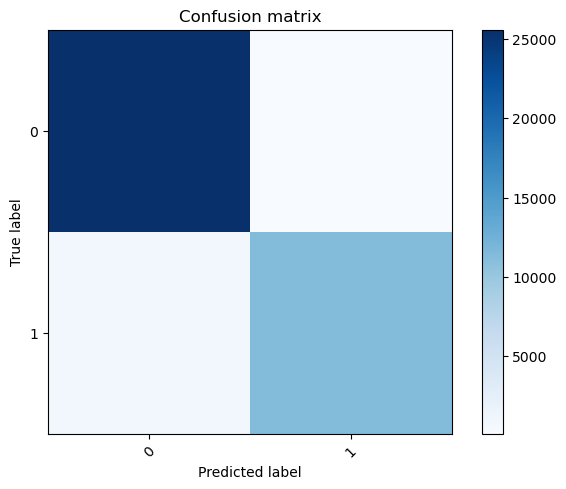

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     25703
           1       0.99      0.93      0.96     12160

    accuracy                           0.98     37863
   macro avg       0.98      0.96      0.97     37863
weighted avg       0.98      0.98      0.98     37863

Actual Values:
[1 1 1 0 1 0 1 0 1 0]


Predicted Values:
[1 1 1 0 1 0 1 0 1 0]


Actual Values:
['Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good']


Predicted Values:
['Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good']


Accuracy score: 0.9758339275810157


Plotting ROC Curve:
--------------------------------------------------


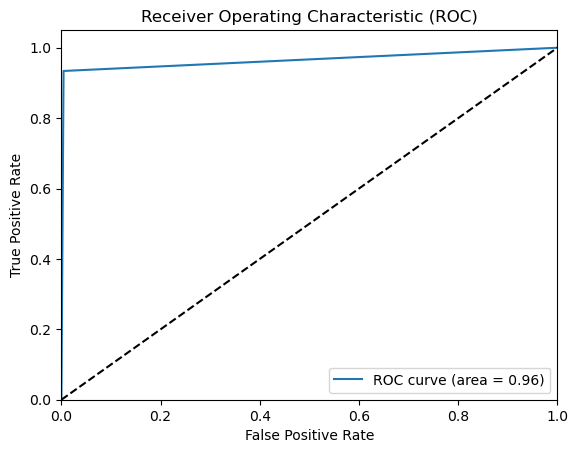

In [37]:
#K-Nearest Neighbor

KNN = KNeighborsClassifier()
KNN.fit(X_train_p1, y_train_p1)
pred_knn = KNN.predict(X_test_p1)

print ('MODEL: Nearest Neighbor')

print('\n')
print('Confusion Matrix:')
print('\n')

labels = [0, 1]
cm = confusion_matrix(y_test_p1, pred_knn)
print(cm)

print('Ploting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, connect_type)
plt.show()

print('Classification Report:')
print(classification_report(y_test_p1, pred_knn))


print('Actual Values:')
print(y_test_p1[:10])
print('\n')
print('Predicted Values:')
print(pred_knn[:10])

dic = {1:'Bad', 0:'Good'}

test = [dic.get(n, n) for n in y_test_p1]
pred = [dic.get(n, n) for n in pred_knn]

print('\n')
print('Actual Values:')
print(test[:10])
print('\n')
print('Predicted Values:')
print(pred[:10])

score_knn = metrics.accuracy_score(y_test_p1, pred_knn)
print('\n')
print("Accuracy score: {}".format(score_knn))

print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_knn, y_test_p1)

### SVM - Support Vector Machine

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression. It aims to find the best hyperplane that separates the data points of different classes with the largest possible margin. SVM is particularly effective in high-dimensional spaces and is relatively memory efficient.

In scikit-learn, a popular Python machine learning library, SVM is implemented in the svm module. The two main classes for classification are SVC (Support Vector Classification) for multi-class and binary classification problems and NuSVC (Nu-Support Vector Classification) which uses a slightly different formulation. For regression problems, scikit-learn provides SVR (Support Vector Regression) and NuSVR (Nu-Support Vector Regression) classes.

In [38]:
#SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_p1, y_train_p1)
pred_svm = svm_model.predict(X_test_p1)

MODEL: SVM


Confusion Matrix:


[[24158  1545]
 [  802 11358]]


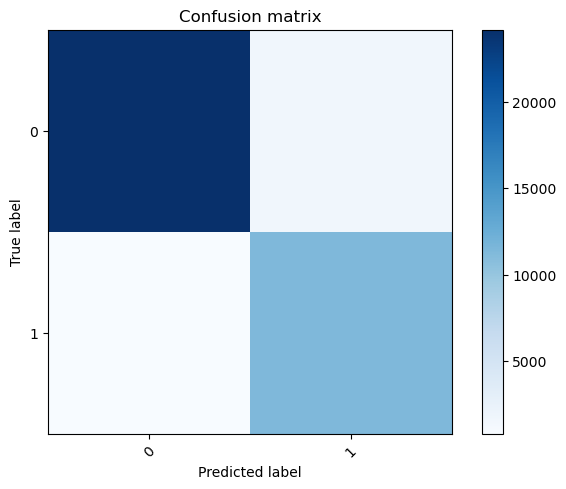

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     25703
           1       0.88      0.93      0.91     12160

    accuracy                           0.94     37863
   macro avg       0.92      0.94      0.93     37863
weighted avg       0.94      0.94      0.94     37863

Actual Values:
[1 1 1 0 1 0 1 0 1 0]


Predicted Values:
[1 1 1 1 1 0 1 0 1 0]


Actual Values:
['Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good']


Predicted Values:
['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good']


Accuracy score: 0.9380133639701027


Plotting ROC Curve:
--------------------------------------------------


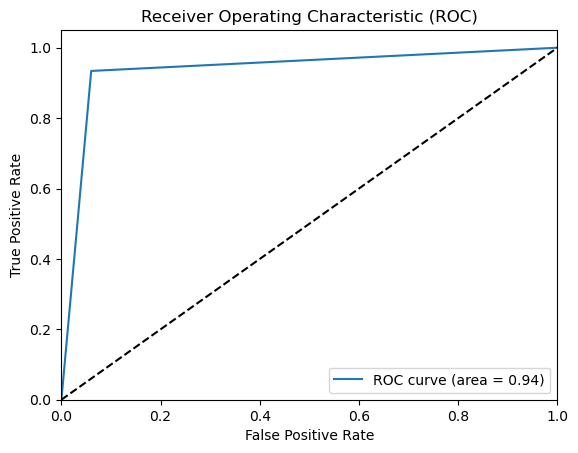

In [39]:
print ('MODEL: SVM')

print('\n')
print('Confusion Matrix:')
print('\n')

labels = [0, 1]
cm = confusion_matrix(y_test_p1, pred_svm)
print(cm)
plt.figure()
plot_confusion_matrix(cm, connect_type)
plt.show()


print('Classification Report:')
print(classification_report(y_test_p1, pred_svm))

print('Actual Values:')
print(y_test_p1[:10])
print('\n')
print('Predicted Values:')
print(pred_log[:10])

dic = {1:'Bad', 0:'Good'}

test = [dic.get(n, n) for n in y_test_p1]
pred = [dic.get(n, n) for n in pred_svm]

print('\n')
print('Actual Values:')
print(test[:10])
print('\n')
print('Predicted Values:')
print(pred[:10])


score_svm = metrics.accuracy_score(y_test_p1, pred_svm)
print('\n')
print("Accuracy score: {}".format(score_svm))

print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_svm, y_test_p1)

#### Gaussian Naive Bayes

GaussianNB is a class in the scikit-learn library that implements the Gaussian Naive Bayes algorithm for classification. Naive Bayes is a family of probabilistic classifiers based on Bayes' theorem, which makes the assumption that the features used for classification are conditionally independent given the class label. This simplification, while not always strictly true, often results in surprisingly good performance for a wide range of classification problems.

Gaussian Naive Bayes assumes that the continuous features used for classification follow a Gaussian (normal) distribution within each class. The algorithm calculates the mean and variance of each feature for each class, and uses this information to estimate the probability of a given data point belonging to each class. The class with the highest probability is then assigned to the data point.

MODEL: Gaussian Naive Bayes


Confusion Matrix:
[[24168  1535]
 [ 1557 10603]]


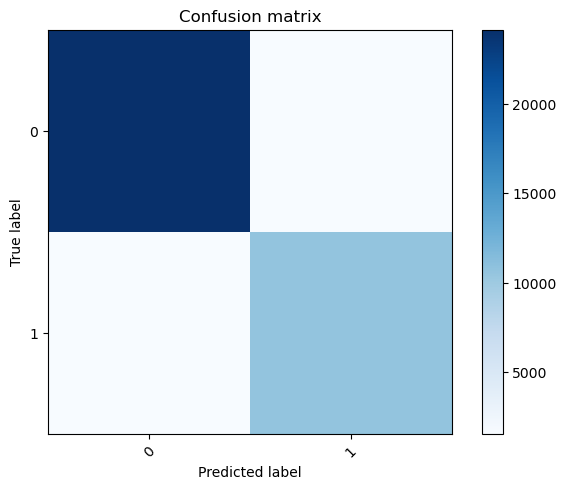

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     25703
           1       0.87      0.85      0.86     12160

    accuracy                           0.91     37863
   macro avg       0.90      0.90      0.90     37863
weighted avg       0.91      0.91      0.91     37863

Actual Values:
[1 1 1 0 1 0 1 0 1 0]


Predicted Values:
[1 1 1 1 1 0 1 0 1 0]


Actual Values:
['Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good']


Predicted Values:
['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good']


Accuracy score: 0.9114703008213824


Plotting ROC Curve:
--------------------------------------------------


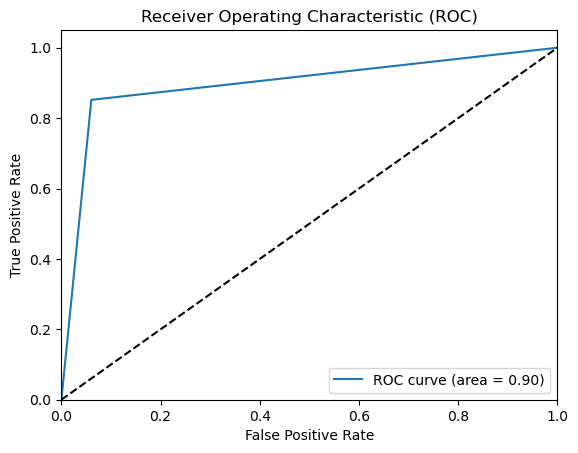

In [40]:
#Gaussian Naive Bayes


GNB = GaussianNB()
GNB.fit(X_train_p1, y_train_p1)
pred_GNB = GNB.predict(X_test_p1)

print ('MODEL: Gaussian Naive Bayes')

print('\n')
print('Confusion Matrix:')
labels = [0, 1]
cm = confusion_matrix(y_test_p1, pred_log)
print(cm)

plt.figure()
plot_confusion_matrix(cm, connect_type)
plt.show()

print('Classification Report:')
print(classification_report(y_test_p1, pred_GNB))

print('Actual Values:')
print(y_test_p1[:10])
print('\n')
print('Predicted Values:')
print(pred_log[:10])

dic = {1:'Bad', 0:'Good'}

test = [dic.get(n, n) for n in y_test_p1]
pred = [dic.get(n, n) for n in pred_GNB]

print('\n')
print('Actual Values:')
print(test[:10])
print('\n')
print('Predicted Values:')
print(pred[:10])

score_GBN = metrics.accuracy_score(y_test_p1, pred_GNB)
print('\n')
print("Accuracy score: {}".format(score_GBN))

print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_GNB, y_test_p1)


#### The comprehensive comparison of all the scikit models implemented

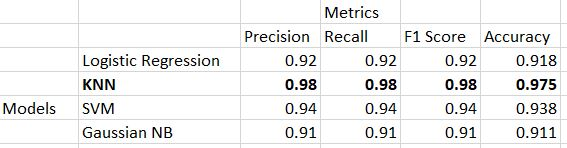

In [41]:
Image("./cls_modelsnorm.jpg")

#### Tensorflow Models

TensorFlow is an open-source machine learning library developed by Google. It is designed for creating, training, and deploying deep learning models efficiently and with high performance. TensorFlow provides a flexible platform for various machine learning and deep learning tasks, such as computer vision, natural language processing, reinforcement learning, and more. It supports multiple programming languages, including Python, and can run on various hardware configurations, from CPUs and GPUs to specialized accelerators like TPUs (Tensor Processing Units).

A fully-connected neural network, also known as a dense neural network or multi-layer perceptron (MLP), is a type of artificial neural network where each neuron in one layer is connected to every neuron in the next layer. This structure allows the network to learn complex, non-linear relationships between input features and output targets. Fully-connected networks are composed of an input layer, one or more hidden layers, and an output layer. The hidden layers are responsible for learning the underlying patterns in the input data.

In [42]:
df_copy.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,protocol_type-icmp,protocol_type-tcp,protocol_type-udp
0,-0.109284,22,9,-0.004564,-0.042751,0,0,0,0,0,...,0.05,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,-0.109284,22,9,-0.004567,-0.029719,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,-0.109284,22,9,-0.004575,-0.029719,0,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,0,0,1,0
3,-0.109284,22,9,-0.004576,-0.019076,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,-0.109284,22,9,-0.004576,-0.019076,0,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,0,0,1,0


In [43]:
x,y = to_xy(df_copy,'outcome')

In [44]:
y.shape

(126208, 2)

In [45]:
x_train_tfc, x_test_tfc, y_train_tfc, y_test_tfc = train_test_split(x, y, test_size=0.3, random_state=1)
x_train_tfc, x_val_tfc, y_train_tfc, y_val_tfc = train_test_split(x_train_tfc, y_train_tfc, test_size=0.2, random_state=1)

In [46]:
x_train_tfc.shape

(70676, 43)

In [47]:
y_train_tfc.shape

(70676, 2)

In [48]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

#### Layers applied - 

1. Relu (50) Relu (25) Relu (25) Adam
2. Sigmoid (50) Sigmoid (25) Relu (25) Adam
3. Tanh (50) Sigmoid (25) Relu (25) Adam
4. Tanh (50) Sigmoid (25) Sigmoid (25) Adam
5. Relu (50) Relu (15) Relu (25) SGD
6. Relu (30) Sigmoid (15) Tanh (25) Adam
7. Relu (20) Sigmoid (12) Relu (10) Adam

In [49]:
checkpointer = ModelCheckpoint(filepath="./best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range (5):
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(25, activation='relu'))   
    model.add(Dense(25, activation='relu'))
    model.add(Dense(y.shape[1],activation='softmax')) # Output

    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train_tfc,y_train_tfc,validation_data=(x_val_tfc,y_val_tfc), batch_size= 128, callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
model.load_weights('./best_weights.hdf5') # load weights from best model

Epoch 1/1000
553/553 - 2s - loss: 0.1438 - val_loss: 0.0607 - 2s/epoch - 3ms/step
Epoch 2/1000
553/553 - 1s - loss: 0.0523 - val_loss: 0.0487 - 945ms/epoch - 2ms/step
Epoch 3/1000
553/553 - 1s - loss: 0.0347 - val_loss: 0.0244 - 995ms/epoch - 2ms/step
Epoch 4/1000
553/553 - 1s - loss: 0.0252 - val_loss: 0.0194 - 1s/epoch - 2ms/step
Epoch 5/1000
553/553 - 1s - loss: 0.0212 - val_loss: 0.0173 - 999ms/epoch - 2ms/step
Epoch 6/1000
553/553 - 1s - loss: 0.0191 - val_loss: 0.0498 - 841ms/epoch - 2ms/step
Epoch 7/1000
553/553 - 1s - loss: 0.0210 - val_loss: 0.0149 - 969ms/epoch - 2ms/step
Epoch 8/1000
553/553 - 1s - loss: 0.0168 - val_loss: 0.0159 - 951ms/epoch - 2ms/step
Epoch 9/1000
553/553 - 1s - loss: 0.0185 - val_loss: 0.0151 - 984ms/epoch - 2ms/step
Epoch 10/1000
553/553 - 1s - loss: 0.0164 - val_loss: 0.0390 - 901ms/epoch - 2ms/step
Epoch 11/1000
553/553 - 1s - loss: 0.0181 - val_loss: 0.0120 - 874ms/epoch - 2ms/step
Epoch 12/1000
553/553 - 1s - loss: 0.0141 - val_loss: 0.0116 - 826ms/

1184/1184 [==============================] - 1s 918us/step
[1 1 1 0 1]

Accuracy score: 0.9977550643108047

Precision score: 0.9977547009623972

Recall score: 0.9977550643108047

F1 score: 0.9977547477742802


[[25667    36]
 [   49 12111]]


Ploting confusion matrix


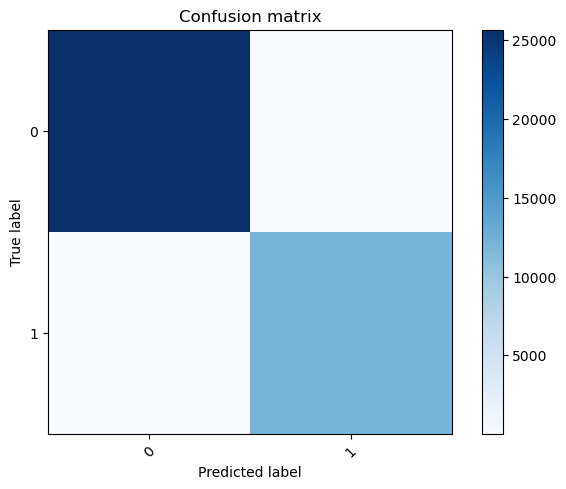



Plotting ROC Curve:
--------------------------------------------------


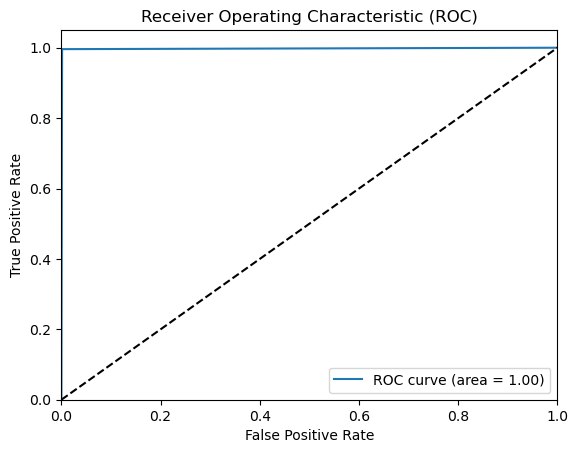

In [50]:
pred_cls = model.predict(x_test_tfc)

pred_cls = np.argmax(pred_cls,axis=1) # raw probabilities to choose class (highest probability)
print(pred_cls[0:5])

y_true= np.argmax(y_test_tfc,axis=1) 

score_tf = metrics.accuracy_score(y_true, pred_cls)

print("\nAccuracy score: {}".format(score_tf))

score = metrics.precision_score(y_true, pred_cls, average= "weighted")
print("\nPrecision score: {}".format(score))

score = metrics.recall_score(y_true, pred_cls, average= "weighted")
print("\nRecall score: {}".format(score))

score = metrics.f1_score(y_true, pred_cls, average= "weighted")
print("\nF1 score: {}".format(score))


# Compute confusion matrix
cm = confusion_matrix(y_true, pred_cls)
print('\n')
print(cm)
print('\n')

print('Ploting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, connect_type)
plt.show()


print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_cls,y_true)

In [51]:
checkpointer = ModelCheckpoint(filepath="./best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range (5):
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='sigmoid'))
    model.add(Dense(25, activation='sigmoid'))   
    model.add(Dense(25, activation='relu'))
    model.add(Dense(y.shape[1],activation='softmax')) # Output

    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train_tfc,y_train_tfc,validation_data=(x_val_tfc,y_val_tfc), batch_size= 128, callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
model.load_weights('./best_weights.hdf5') # load weights from best model

Epoch 1/1000
553/553 - 2s - loss: 0.1683 - val_loss: 0.0720 - 2s/epoch - 3ms/step
Epoch 2/1000
553/553 - 1s - loss: 0.0522 - val_loss: 0.0361 - 943ms/epoch - 2ms/step
Epoch 3/1000
553/553 - 1s - loss: 0.0297 - val_loss: 0.0249 - 893ms/epoch - 2ms/step
Epoch 4/1000
553/553 - 1s - loss: 0.0221 - val_loss: 0.0209 - 853ms/epoch - 2ms/step
Epoch 5/1000
553/553 - 1s - loss: 0.0196 - val_loss: 0.0229 - 868ms/epoch - 2ms/step
Epoch 6/1000
553/553 - 1s - loss: 0.0160 - val_loss: 0.0151 - 879ms/epoch - 2ms/step
Epoch 7/1000
553/553 - 1s - loss: 0.0150 - val_loss: 0.0142 - 864ms/epoch - 2ms/step
Epoch 8/1000
553/553 - 1s - loss: 0.0145 - val_loss: 0.0121 - 894ms/epoch - 2ms/step
Epoch 9/1000
553/553 - 1s - loss: 0.0119 - val_loss: 0.0130 - 831ms/epoch - 2ms/step
Epoch 10/1000
553/553 - 1s - loss: 0.0120 - val_loss: 0.0116 - 876ms/epoch - 2ms/step
Epoch 11/1000
553/553 - 1s - loss: 0.0107 - val_loss: 0.0108 - 955ms/epoch - 2ms/step
Epoch 12/1000
553/553 - 1s - loss: 0.0109 - val_loss: 0.0104 - 1s/

1184/1184 [==============================] - 1s 1ms/step
[1 1 1 0 1]

Accuracy score: 0.9979135303594538

Precision score: 0.9979134867463596

Recall score: 0.9979135303594538

F1 score: 0.9979135077551549


[[25664    39]
 [   40 12120]]


Ploting confusion matrix


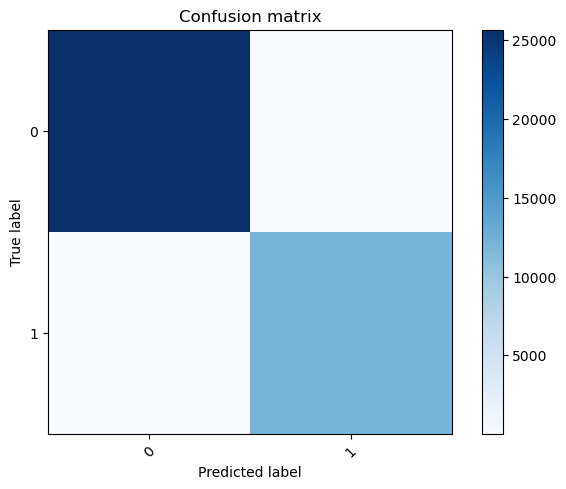



Plotting ROC Curve:
--------------------------------------------------


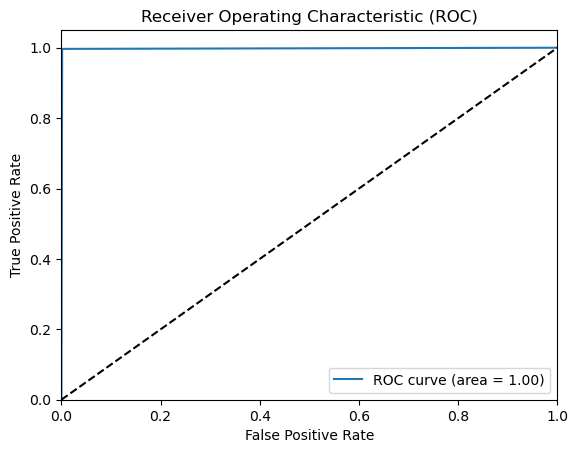

In [52]:
pred_cls = model.predict(x_test_tfc)

pred_cls = np.argmax(pred_cls,axis=1) # raw probabilities to choose class (highest probability)
print(pred_cls[0:5])

y_true= np.argmax(y_test_tfc,axis=1) 

score_tf = metrics.accuracy_score(y_true, pred_cls)

print("\nAccuracy score: {}".format(score_tf))

score = metrics.precision_score(y_true, pred_cls, average= "weighted")
print("\nPrecision score: {}".format(score))

score = metrics.recall_score(y_true, pred_cls, average= "weighted")
print("\nRecall score: {}".format(score))

score = metrics.f1_score(y_true, pred_cls, average= "weighted")
print("\nF1 score: {}".format(score))

# Compute confusion matrix
cm = confusion_matrix(y_true, pred_cls)
print('\n')
print(cm)
print('\n')

print('Ploting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, connect_type)
plt.show()


print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_cls,y_true)

In [53]:
checkpointer = ModelCheckpoint(filepath="./best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range (5):
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='tanh'))
    model.add(Dense(25, activation='sigmoid'))   
    model.add(Dense(25, activation='relu'))
    model.add(Dense(y.shape[1],activation='softmax')) # Output

    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train_tfc,y_train_tfc,validation_data=(x_val_tfc,y_val_tfc), batch_size= 128, callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
model.load_weights('./best_weights.hdf5') # load weights from best model

Epoch 1/1000
553/553 - 2s - loss: 0.1279 - val_loss: 0.0620 - 2s/epoch - 3ms/step
Epoch 2/1000
553/553 - 1s - loss: 0.0411 - val_loss: 0.0292 - 968ms/epoch - 2ms/step
Epoch 3/1000
553/553 - 1s - loss: 0.0283 - val_loss: 0.0251 - 965ms/epoch - 2ms/step
Epoch 4/1000
553/553 - 1s - loss: 0.0224 - val_loss: 0.0255 - 895ms/epoch - 2ms/step
Epoch 5/1000
553/553 - 1s - loss: 0.0186 - val_loss: 0.0211 - 905ms/epoch - 2ms/step
Epoch 6/1000
553/553 - 1s - loss: 0.0161 - val_loss: 0.0181 - 870ms/epoch - 2ms/step
Epoch 7/1000
553/553 - 1s - loss: 0.0154 - val_loss: 0.0162 - 966ms/epoch - 2ms/step
Epoch 8/1000
553/553 - 1s - loss: 0.0141 - val_loss: 0.0150 - 1s/epoch - 2ms/step
Epoch 9/1000
553/553 - 1s - loss: 0.0141 - val_loss: 0.0169 - 1s/epoch - 2ms/step
Epoch 10/1000
553/553 - 1s - loss: 0.0137 - val_loss: 0.0202 - 940ms/epoch - 2ms/step
Epoch 11/1000
553/553 - 1s - loss: 0.0114 - val_loss: 0.0121 - 1s/epoch - 2ms/step
Epoch 12/1000
553/553 - 1s - loss: 0.0131 - val_loss: 0.0125 - 1s/epoch - 2

1184/1184 [==============================] - 1s 983us/step
[1 1 1 0 1]

Accuracy score: 0.9978342973351293

Precision score: 0.9978340730930263

Recall score: 0.9978342973351293

F1 score: 0.9978341564917576


[[25665    38]
 [   44 12116]]


Ploting confusion matrix


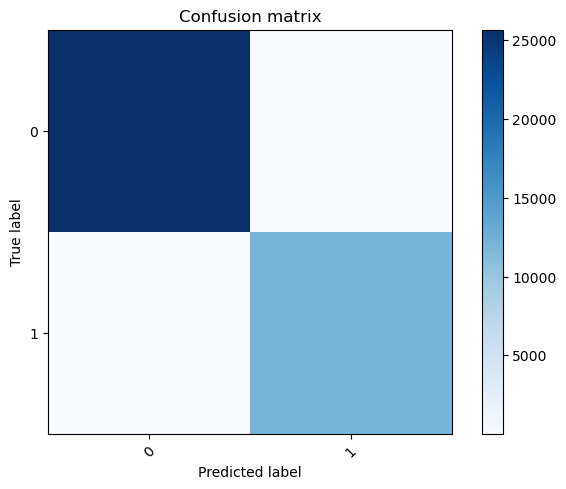



Plotting ROC Curve:
--------------------------------------------------


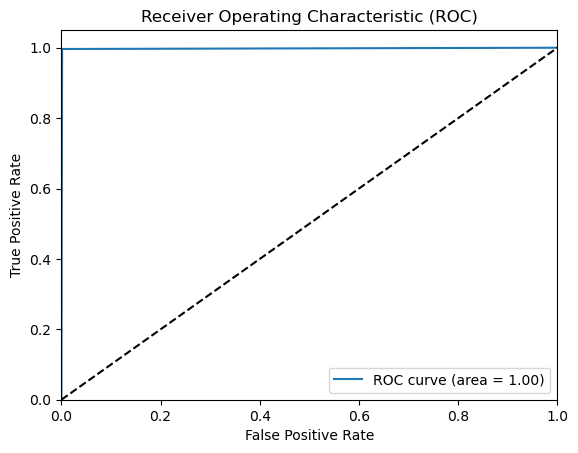

In [54]:
pred_cls = model.predict(x_test_tfc)

pred_cls = np.argmax(pred_cls,axis=1) # raw probabilities to choose class (highest probability)
print(pred_cls[0:5])

y_true= np.argmax(y_test_tfc,axis=1) 

score_tf = metrics.accuracy_score(y_true, pred_cls)

print("\nAccuracy score: {}".format(score_tf))

score = metrics.precision_score(y_true, pred_cls, average= "weighted")
print("\nPrecision score: {}".format(score))

score = metrics.recall_score(y_true, pred_cls, average= "weighted")
print("\nRecall score: {}".format(score))

score = metrics.f1_score(y_true, pred_cls, average= "weighted")
print("\nF1 score: {}".format(score))

# Compute confusion matrix
cm = confusion_matrix(y_true, pred_cls)
print('\n')
print(cm)
print('\n')

print('Ploting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, connect_type)
plt.show()


print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_cls,y_true)

In [55]:
checkpointer = ModelCheckpoint(filepath="./best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range (5):
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='tanh'))
    model.add(Dense(25, activation='sigmoid'))   
    model.add(Dense(25, activation='sigmoid'))
    model.add(Dense(y.shape[1],activation='softmax')) # Output

    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train_tfc,y_train_tfc,validation_data=(x_val_tfc,y_val_tfc), batch_size= 128, callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
model.load_weights('./best_weights.hdf5') # load weights from best model

Epoch 1/1000
553/553 - 2s - loss: 0.2118 - val_loss: 0.0861 - 2s/epoch - 3ms/step
Epoch 2/1000
553/553 - 1s - loss: 0.0642 - val_loss: 0.0467 - 1s/epoch - 2ms/step
Epoch 3/1000
553/553 - 1s - loss: 0.0342 - val_loss: 0.0269 - 968ms/epoch - 2ms/step
Epoch 4/1000
553/553 - 1s - loss: 0.0255 - val_loss: 0.0214 - 981ms/epoch - 2ms/step
Epoch 5/1000
553/553 - 1s - loss: 0.0228 - val_loss: 0.0193 - 959ms/epoch - 2ms/step
Epoch 6/1000
553/553 - 1s - loss: 0.0202 - val_loss: 0.0164 - 947ms/epoch - 2ms/step
Epoch 7/1000
553/553 - 1s - loss: 0.0186 - val_loss: 0.0159 - 1s/epoch - 2ms/step
Epoch 8/1000
553/553 - 1s - loss: 0.0179 - val_loss: 0.0185 - 1s/epoch - 2ms/step
Epoch 9/1000
553/553 - 1s - loss: 0.0161 - val_loss: 0.0127 - 938ms/epoch - 2ms/step
Epoch 10/1000
553/553 - 1s - loss: 0.0150 - val_loss: 0.0141 - 878ms/epoch - 2ms/step
Epoch 11/1000
553/553 - 1s - loss: 0.0150 - val_loss: 0.0137 - 905ms/epoch - 2ms/step
Epoch 12/1000
553/553 - 1s - loss: 0.0150 - val_loss: 0.0139 - 881ms/epoch 

Epoch 18/1000
553/553 - 1s - loss: 0.0129 - val_loss: 0.0114 - 857ms/epoch - 2ms/step
Epoch 19/1000
553/553 - 1s - loss: 0.0102 - val_loss: 0.0126 - 994ms/epoch - 2ms/step
Epoch 20/1000
553/553 - 1s - loss: 0.0103 - val_loss: 0.0101 - 1s/epoch - 2ms/step
Epoch 21/1000
553/553 - 1s - loss: 0.0098 - val_loss: 0.0116 - 948ms/epoch - 2ms/step
Epoch 22/1000
553/553 - 1s - loss: 0.0104 - val_loss: 0.0107 - 983ms/epoch - 2ms/step
Epoch 22: early stopping


1184/1184 [==============================] - 1s 1ms/step
[1 1 1 0 1]

Accuracy score: 0.9974117212053984

Precision score: 0.9974122714784488

Recall score: 0.9974117212053984

F1 score: 0.9974119453388474


[[25650    53]
 [   45 12115]]


Ploting confusion matrix


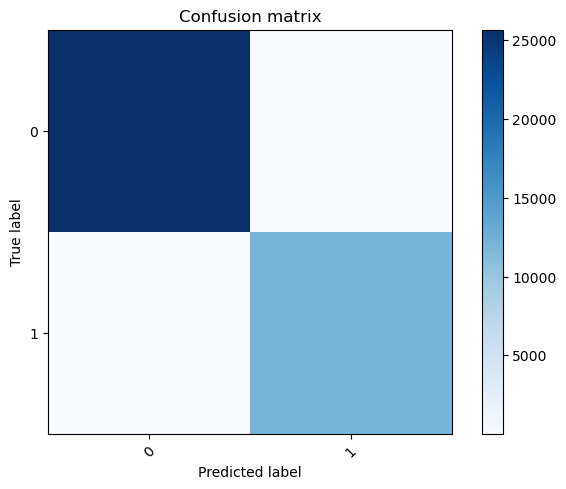



Plotting ROC Curve:
--------------------------------------------------


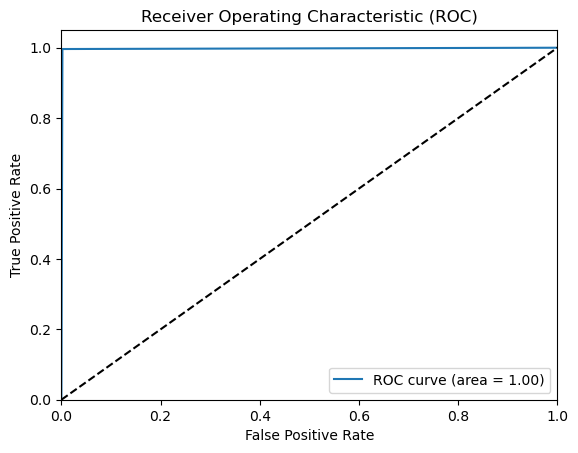

In [56]:
pred_cls = model.predict(x_test_tfc)

pred_cls = np.argmax(pred_cls,axis=1) # raw probabilities to choose class (highest probability)
print(pred_cls[0:5])

y_true= np.argmax(y_test_tfc,axis=1) 

score_tf = metrics.accuracy_score(y_true, pred_cls)

print("\nAccuracy score: {}".format(score_tf))

score = metrics.precision_score(y_true, pred_cls, average= "weighted")
print("\nPrecision score: {}".format(score))

score = metrics.recall_score(y_true, pred_cls, average= "weighted")
print("\nRecall score: {}".format(score))

score = metrics.f1_score(y_true, pred_cls, average= "weighted")
print("\nF1 score: {}".format(score))

# Compute confusion matrix
cm = confusion_matrix(y_true, pred_cls)
print('\n')
print(cm)
print('\n')

print('Ploting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, connect_type)
plt.show()


print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_cls,y_true)

In [57]:
checkpointer = ModelCheckpoint(filepath="./best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range (5):
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(25, activation='relu'))   
    model.add(Dense(25, activation='relu'))
    model.add(Dense(y.shape[1],activation='softmax')) # Output

    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer='SGD')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train_tfc,y_train_tfc,validation_data=(x_val_tfc,y_val_tfc), batch_size= 128, callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
model.load_weights('./best_weights.hdf5') # load weights from best model

Epoch 1/1000
553/553 - 2s - loss: 0.1448 - val_loss: 0.0918 - 2s/epoch - 3ms/step
Epoch 2/1000
553/553 - 1s - loss: 0.0889 - val_loss: 0.0961 - 954ms/epoch - 2ms/step
Epoch 3/1000
553/553 - 1s - loss: 0.0829 - val_loss: 0.0916 - 889ms/epoch - 2ms/step
Epoch 4/1000
553/553 - 1s - loss: 0.0796 - val_loss: 0.1908 - 962ms/epoch - 2ms/step
Epoch 5/1000
553/553 - 1s - loss: 0.0769 - val_loss: 0.4312 - 869ms/epoch - 2ms/step
Epoch 6/1000
553/553 - 1s - loss: 0.0738 - val_loss: 0.0995 - 814ms/epoch - 1ms/step
Epoch 6: early stopping
Epoch 1/1000
553/553 - 1s - loss: 0.1381 - val_loss: 0.1899 - 1s/epoch - 3ms/step
Epoch 2/1000
553/553 - 1s - loss: 0.0919 - val_loss: 0.1041 - 977ms/epoch - 2ms/step
Epoch 3/1000
553/553 - 1s - loss: 0.0860 - val_loss: 0.1063 - 885ms/epoch - 2ms/step
Epoch 4/1000
553/553 - 1s - loss: 0.0824 - val_loss: 0.0840 - 949ms/epoch - 2ms/step
Epoch 5/1000
553/553 - 1s - loss: 0.0776 - val_loss: 0.1170 - 933ms/epoch - 2ms/step
Epoch 6/1000
553/553 - 1s - loss: 0.0780 - val_

1184/1184 [==============================] - 1s 996us/step
[1 1 1 0 1]

Accuracy score: 0.9851041914269868

Precision score: 0.9851566159637524

Recall score: 0.9851041914269868

F1 score: 0.9850519897290141


[[25578   125]
 [  439 11721]]


Ploting confusion matrix


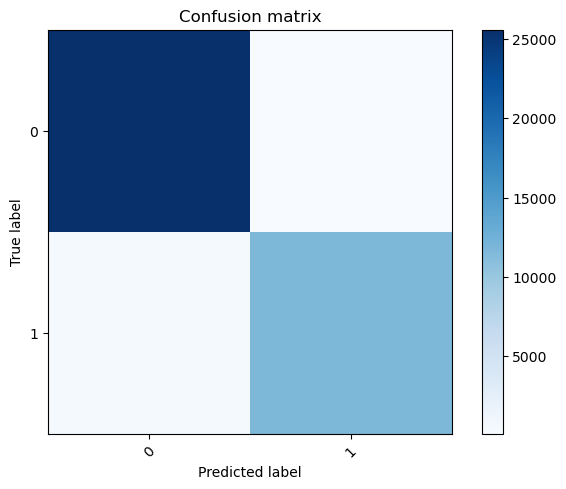



Plotting ROC Curve:
--------------------------------------------------


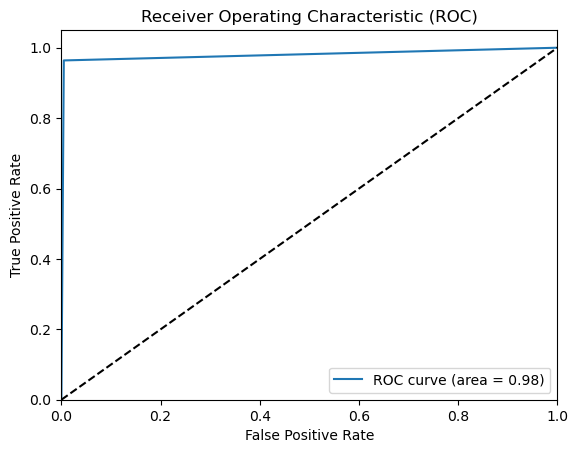

In [58]:
pred_cls = model.predict(x_test_tfc)

pred_cls = np.argmax(pred_cls,axis=1) # raw probabilities to choose class (highest probability)
print(pred_cls[0:5])

y_true= np.argmax(y_test_tfc,axis=1) 

score_tf = metrics.accuracy_score(y_true, pred_cls)

print("\nAccuracy score: {}".format(score_tf))

score = metrics.precision_score(y_true, pred_cls, average= "weighted")
print("\nPrecision score: {}".format(score))

score = metrics.recall_score(y_true, pred_cls, average= "weighted")
print("\nRecall score: {}".format(score))

score = metrics.f1_score(y_true, pred_cls, average= "weighted")
print("\nF1 score: {}".format(score))

# Compute confusion matrix
cm = confusion_matrix(y_true, pred_cls)
print('\n')
print(cm)
print('\n')

print('Ploting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, connect_type)
plt.show()


print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_cls,y_true)

In [59]:
checkpointer = ModelCheckpoint(filepath="./best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range (5):
    model = Sequential()
    model.add(Dense(30, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(15, activation='sigmoid'))   
    model.add(Dense(15, activation='tanh'))
    model.add(Dense(y.shape[1],activation='softmax')) # Output

    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer='Adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train_tfc,y_train_tfc,validation_data=(x_val_tfc,y_val_tfc), batch_size= 128, callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
model.load_weights('./best_weights.hdf5') # load weights from best model

Epoch 1/1000
553/553 - 2s - loss: 0.2037 - val_loss: 0.0760 - 2s/epoch - 4ms/step
Epoch 2/1000
553/553 - 1s - loss: 0.0543 - val_loss: 0.0388 - 1s/epoch - 2ms/step
Epoch 3/1000
553/553 - 1s - loss: 0.0335 - val_loss: 0.0386 - 1s/epoch - 2ms/step
Epoch 4/1000
553/553 - 1s - loss: 0.0275 - val_loss: 0.0236 - 1s/epoch - 2ms/step
Epoch 5/1000
553/553 - 1s - loss: 0.0250 - val_loss: 0.0198 - 927ms/epoch - 2ms/step
Epoch 6/1000
553/553 - 1s - loss: 0.0236 - val_loss: 0.0199 - 991ms/epoch - 2ms/step
Epoch 7/1000
553/553 - 1s - loss: 0.0218 - val_loss: 0.0471 - 978ms/epoch - 2ms/step
Epoch 8/1000
553/553 - 1s - loss: 0.0222 - val_loss: 0.0169 - 922ms/epoch - 2ms/step
Epoch 9/1000
553/553 - 1s - loss: 0.0201 - val_loss: 0.0173 - 885ms/epoch - 2ms/step
Epoch 10/1000
553/553 - 1s - loss: 0.0196 - val_loss: 0.0178 - 843ms/epoch - 2ms/step
Epoch 11/1000
553/553 - 1s - loss: 0.0192 - val_loss: 0.0157 - 1s/epoch - 2ms/step
Epoch 12/1000
553/553 - 1s - loss: 0.0192 - val_loss: 0.0189 - 958ms/epoch - 2

1184/1184 [==============================] - 1s 887us/step
[1 1 1 0 1]

Accuracy score: 0.9963816918891794

Precision score: 0.9963875652900781

Recall score: 0.9963816918891794

F1 score: 0.9963832926450449


[[25614    89]
 [   48 12112]]


Ploting confusion matrix


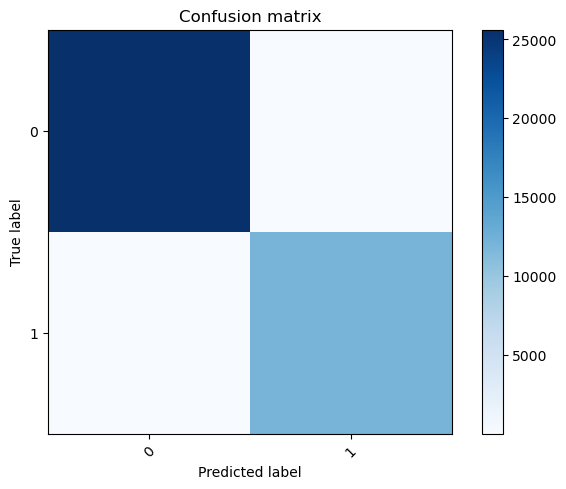



Plotting ROC Curve:
--------------------------------------------------


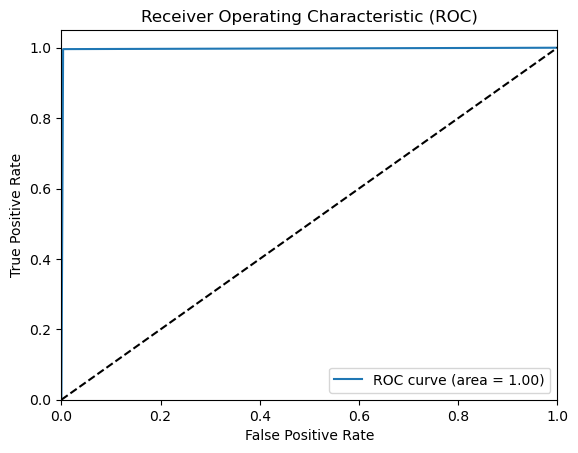

In [60]:
pred_cls = model.predict(x_test_tfc)

pred_cls = np.argmax(pred_cls,axis=1) # raw probabilities to choose class (highest probability)
print(pred_cls[0:5])

y_true= np.argmax(y_test_tfc,axis=1) 

score_tf = metrics.accuracy_score(y_true, pred_cls)

print("\nAccuracy score: {}".format(score_tf))

score = metrics.precision_score(y_true, pred_cls, average= "weighted")
print("\nPrecision score: {}".format(score))

score = metrics.recall_score(y_true, pred_cls, average= "weighted")
print("\nRecall score: {}".format(score))

score = metrics.f1_score(y_true, pred_cls, average= "weighted")
print("\nF1 score: {}".format(score))

# Compute confusion matrix
cm = confusion_matrix(y_true, pred_cls)
print('\n')
print(cm)
print('\n')

print('Ploting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, connect_type)
plt.show()


print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_cls,y_true)

In [61]:
checkpointer = ModelCheckpoint(filepath="./best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range (5):
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(12, activation='sigmoid'))   
    model.add(Dense(10, activation='relu'))
    model.add(Dense(y.shape[1],activation='softmax')) # Output

    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer='Adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


    # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
    model.fit(x_train_tfc,y_train_tfc,validation_data=(x_val_tfc,y_val_tfc), batch_size= 128, callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
model.load_weights('./best_weights.hdf5') # load weights from best model

Epoch 1/1000
553/553 - 2s - loss: 0.2960 - val_loss: 0.0966 - 2s/epoch - 3ms/step
Epoch 2/1000
553/553 - 1s - loss: 0.0770 - val_loss: 0.0658 - 822ms/epoch - 1ms/step
Epoch 3/1000
553/553 - 1s - loss: 0.0614 - val_loss: 0.0555 - 852ms/epoch - 2ms/step
Epoch 4/1000
553/553 - 1s - loss: 0.0534 - val_loss: 0.0544 - 917ms/epoch - 2ms/step
Epoch 5/1000
553/553 - 1s - loss: 0.0430 - val_loss: 0.0333 - 909ms/epoch - 2ms/step
Epoch 6/1000
553/553 - 1s - loss: 0.0325 - val_loss: 0.0272 - 914ms/epoch - 2ms/step
Epoch 7/1000
553/553 - 1s - loss: 0.0289 - val_loss: 0.0239 - 917ms/epoch - 2ms/step
Epoch 8/1000
553/553 - 1s - loss: 0.0267 - val_loss: 0.0234 - 932ms/epoch - 2ms/step
Epoch 9/1000
553/553 - 1s - loss: 0.0237 - val_loss: 0.0208 - 886ms/epoch - 2ms/step
Epoch 10/1000
553/553 - 1s - loss: 0.0223 - val_loss: 0.0213 - 833ms/epoch - 2ms/step
Epoch 11/1000
553/553 - 1s - loss: 0.0222 - val_loss: 0.0203 - 877ms/epoch - 2ms/step
Epoch 12/1000
553/553 - 1s - loss: 0.0209 - val_loss: 0.0182 - 900

553/553 - 1s - loss: 0.0134 - val_loss: 0.0126 - 802ms/epoch - 1ms/step
Epoch 21/1000
553/553 - 1s - loss: 0.0135 - val_loss: 0.0128 - 840ms/epoch - 2ms/step
Epoch 22/1000
553/553 - 1s - loss: 0.0120 - val_loss: 0.0110 - 783ms/epoch - 1ms/step
Epoch 23/1000
553/553 - 1s - loss: 0.0119 - val_loss: 0.0096 - 880ms/epoch - 2ms/step
Epoch 24/1000
553/553 - 1s - loss: 0.0121 - val_loss: 0.0123 - 880ms/epoch - 2ms/step
Epoch 25/1000
553/553 - 1s - loss: 0.0130 - val_loss: 0.0121 - 901ms/epoch - 2ms/step
Epoch 26/1000
553/553 - 1s - loss: 0.0241 - val_loss: 0.0117 - 797ms/epoch - 1ms/step
Epoch 27/1000
553/553 - 1s - loss: 0.0102 - val_loss: 0.0095 - 822ms/epoch - 1ms/step
Epoch 28/1000
553/553 - 1s - loss: 0.0092 - val_loss: 0.0099 - 808ms/epoch - 1ms/step
Epoch 28: early stopping


1184/1184 [==============================] - 1s 906us/step
[1 1 1 0 1]

Accuracy score: 0.9974117212053984

Precision score: 0.9974112270844426

Recall score: 0.9974117212053984

F1 score: 0.99741121565157


[[25663    40]
 [   58 12102]]


Ploting confusion matrix


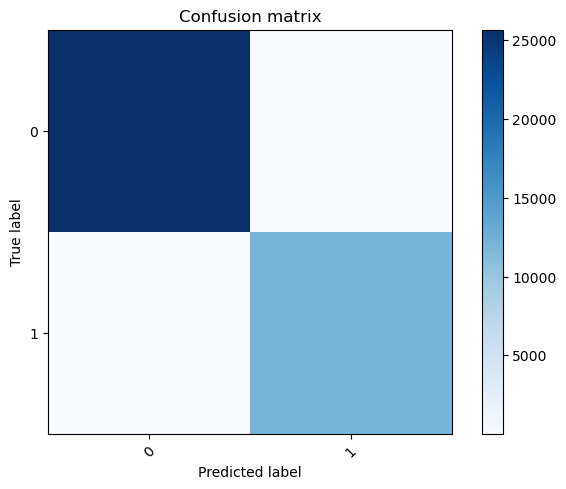



Plotting ROC Curve:
--------------------------------------------------


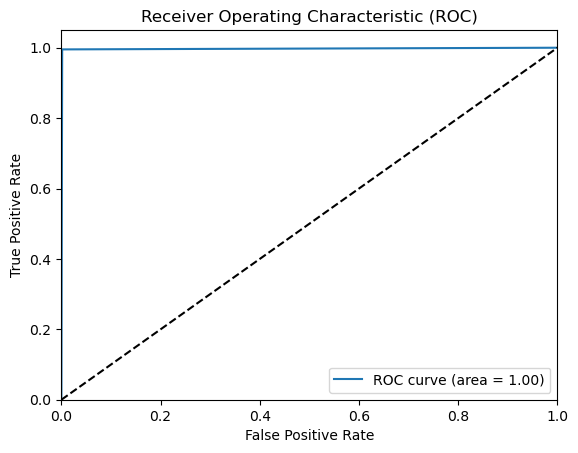

In [62]:
pred_cls = model.predict(x_test_tfc)

pred_cls = np.argmax(pred_cls,axis=1) # raw probabilities to choose class (highest probability)
print(pred_cls[0:5])

y_true= np.argmax(y_test_tfc,axis=1) 

score_tf = metrics.accuracy_score(y_true, pred_cls)

print("\nAccuracy score: {}".format(score_tf))

score = metrics.precision_score(y_true, pred_cls, average= "weighted")
print("\nPrecision score: {}".format(score))

score = metrics.recall_score(y_true, pred_cls, average= "weighted")
print("\nRecall score: {}".format(score))

score = metrics.f1_score(y_true, pred_cls, average= "weighted")
print("\nF1 score: {}".format(score))

# Compute confusion matrix
cm = confusion_matrix(y_true, pred_cls)
print('\n')
print(cm)
print('\n')

print('Ploting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, connect_type)
plt.show()


print('\n')
print('Plotting ROC Curve:')
print ('--------------------------------------------------')
plot_roc(pred_cls,y_true)

#### Comparison of the results from all the tensorflow models implemented above - 

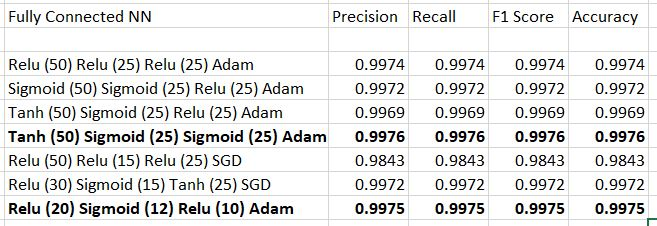

In [63]:
Image("./cls_fcnn.jpg")